In [1]:
# from IPython.core.display import HTML
# HTML("""
# <style>
# .prompt{display: none}
# .prompt_container{display: none;}
# .container{width: auto !important;}
# .btn { font-size: 9px; }
# #menubar { max-height: 2em; overflow: hidden;}
# </style>
# """)

In [2]:
!ls

2017 NEISS Data Highlights.pdf        Untitled1.ipynb
2018-NEISS-CPSC-only-CodingManual.pdf neiss2017_edited.tsv
2018ComparabilityTable.pdf            neiss_products.txt
Untitled.ipynb                        sales.csv


In [136]:
# special characters:
# tab = \t
# newline (pressing enter) = \n
# carriage return = \r
# ...other ones
import pandas as pd

# Print out EVERYTHING!!! inside of each column
pd.options.display.max_colwidth = 500

# If you see a zero, count it as missing data
df = pd.read_csv("neiss2017_edited.tsv",
                 sep="\t",
                 encoding='latin-1',
                 na_values=[0, 'UNKNOWN', 'NS'])
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21YO,1.0,1.0,NaN,75.0,62,NaN,1,1.0,NaN,1207,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION,S,46.0,77.6641
1,170100734,01/01/2017,71YO,1.0,1.0,NaN,31.0,53,NaN,1,5.0,NaN,1807,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16YO,1.0,1.0,NaN,33.0,51,NaN,1,1.0,NaN,676,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNING FIREPLACE,"DX BURNS INVOLVING LESS THAN 10% OF BODY SURFACE, FOREARM",S,46.0,77.6641
3,170100737,01/01/2017,NaN,2.0,1.0,NaN,75.0,62,NaN,1,1.0,NaN,620,NaN,55YOF WAS STANDING ON A STEP STOOL AND LOST FOOTING AND FELL. DX CLOSED,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86YO,2.0,1.0,NaN,79.0,58,NaN,1,1.0,NaN,1646,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD STRIKING BACK ON A *** HUTC,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


In [137]:
df.dtypes

CPSC_Case_Number      int64
Treatment_Date       object
Age                  object
Sex                 float64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis             int64
Other_Diagnosis      object
Disposition           int64
Location            float64
Fire_Involvement    float64
Product_1             int64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [1]:
# calculate the average weight of
# someone who goes to the emergency room
# ....median

# dataframe!
# 1. filter? NO!
# 2. group? NO!
# 3. grab a column? YES! ['Weight']
# 4. do some sort of aggregation? YES! .median()
df['Weight'].median()

NameError: name 'df' is not defined

In [139]:
df['Weight'].describe()

count    386905.000000
mean         38.065416
std          31.178751
min           4.757000
25%          15.447200
50%          16.991900
75%          75.565100
max          87.090400
Name: Weight, dtype: float64

<Axes: >

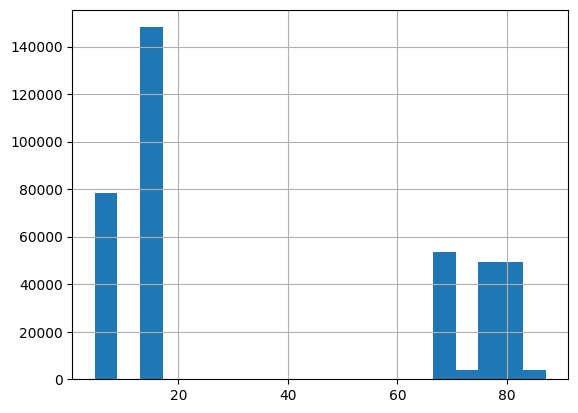

In [140]:
df['Weight'].hist(bins=20)

## Okay moving on to the age columns

Get the median age of someone who goes to the emergency room. Then get a histogram!

In [141]:
df.head(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21YO,1.0,1.0,NaN,75.0,62,NaN,1,1.0,NaN,1207,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION,S,46.0,77.6641
1,170100734,01/01/2017,71YO,1.0,1.0,NaN,31.0,53,NaN,1,5.0,NaN,1807,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641


In [142]:
df['Age'].median()

TypeError: Cannot convert ['21YO' '71YO' '16YO' ... '218YO' '202YO' '2YO'] to numeric

# Jonathan Soma's rules for data cleaning:

1. Find what you want and just delete all the rest
    - find what you DON'T want and replace it with nothing

In [143]:
# Run this, then get the median of age
# Remove the "YO" from "21YO" and convert it to a float
# because sometimes the year is missing and therefore
# we cannot store it as an integer because integer columns
# can never have missing data, they have to be floats
# that's just... how it is, and relax because 3.0 and 3 are
# the same I promise (mostly)
df['Age'] = df['Age'].str.replace("YO", "").astype(float)

In [144]:
df['Age'].median()

29.0

<Axes: >

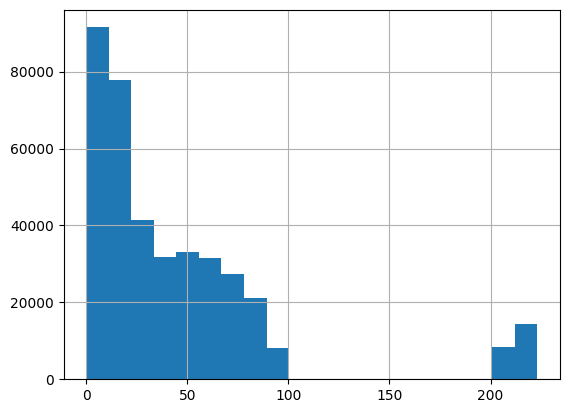

In [145]:
df['Age'].hist(bins=20)

In [146]:
# Filter for people who are 200 years old or older
# and see what their problems are
df[df['Age'] >= 200]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
72,170104133,01/01/2017,212.0,1.0,NaN,NaN,75.0,62,NaN,1,1.0,NaN,671,NaN,12 MONTH OLD MALE CLIMBED UP ONTO ROCKING CHAR AND FELL HITTING HEAD WI,TH CLOSED HEAD INJ,V,38.0,16.1828
116,170106101,01/01/2017,208.0,2.0,3.0,NaN,75.0,53,NaN,1,1.0,NaN,4076,1807.0,8 MOF FELL OFF BED TO FLOOR. DX SCALP CONTUSION,NaN,C,31.0,4.7570
125,170106113,01/01/2017,218.0,2.0,1.0,NaN,83.0,57,NaN,1,1.0,NaN,1545,NaN,18 MOF FELL FROM CRIB. DX FOOT FX,NaN,C,31.0,4.7570
126,170106117,01/01/2017,218.0,1.0,1.0,NaN,32.0,55,NaN,1,5.0,NaN,1645,NaN,18 MOM - PT EATING SPAGHETTI AT A RESTAURANT AND MOM PULLED UP PTS SLEE,VE AND HEARD A POP. DX NURSEMAIDS ELBOW,C,31.0,4.7570
129,170106120,01/01/2017,204.0,2.0,3.0,HISPANIC,75.0,53,NaN,1,1.0,NaN,4076,1807.0,4 MOF FELL OFF BED TO FLOOR. DX SCALP CONTUSION,NaN,C,31.0,4.7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386889,180309750,12/18/2017,212.0,2.0,2.0,NaN,75.0,62,NaN,4,1.0,NaN,661,NaN,"12MO F FELL OFF BUNK BED;DX CLOSED HEAD INJURY, HEAD TRAUMA, SEIZURE",NaN,C,20.0,4.7570
386891,180309752,12/19/2017,218.0,1.0,1.0,NaN,85.0,68,NaN,4,1.0,NaN,1913,NaN,18MO M WITH REACTION TO *** LOTION; DX ALLERGIC REACTION,NaN,C,20.0,4.7570
386902,180309763,12/31/2017,212.0,2.0,2.0,NaN,92.0,50,NaN,4,1.0,NaN,4076,NaN,"12MO F PT LYING IN BED, THERE WAS A DRIVE-BY SHOOTING, BULLET WENT THRO",UGH WALL AND HIT PT IN BED; DX AMPUTATED THUMB,C,20.0,4.7570
386903,180309764,12/31/2017,218.0,1.0,1.0,NaN,81.0,57,NaN,4,1.0,NaN,1395,NaN,18MO M SLIPPED ON TOY;DX FEMUR FX,NaN,C,20.0,4.7570


In [147]:
# 1 month = 201
# 2 months = 202
# 3 months = 303
#

In [148]:
# no more babies!
df = df[df['Age'] < 200]
df.shape

(364087, 19)

<Axes: >

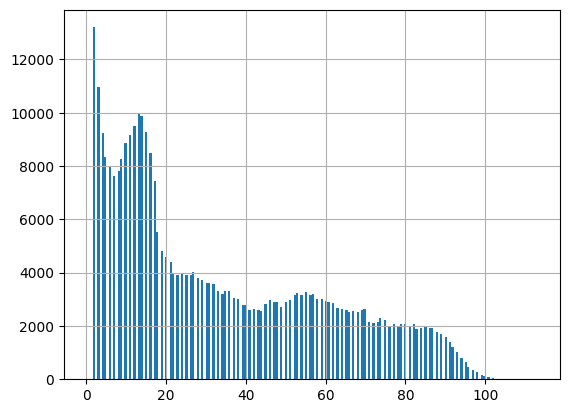

In [149]:
df['Age'].hist(bins=200)

In [150]:
# Your mission: Get the average age by sex
df.groupby('Sex')['Age'].median()

Sex
1.0    21.0
2.0    32.0
Name: Age, dtype: float64

In [151]:
df['Sex'].value_counts()

Sex
1.0    196180
2.0    167900
Name: count, dtype: int64

In [152]:
df['Sex'].value_counts(dropna=False)

Sex
1.0    196180
2.0    167900
NaN         7
Name: count, dtype: int64

In [153]:
# these do the same thing
# neither include 'nan'
# give me places where Sex is missing
# df[df['Sex'].isna()]
# df[df['Sex'].isnull()]

In [154]:
# .str.replace = used for replacing part of a string
# df['Age'].str.replace

# we want to replace an ENTIRE CELL!!!!
# if it's 1 => male
# if it's 2 => female
# df['Sex'].replace

df['Sex'] = df['Sex'].replace({
    1: 'male',
    2: 'female'
})

In [155]:
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,male,1.0,NaN,75.0,62,NaN,1,1.0,NaN,1207,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION,S,46.0,77.6641
1,170100734,01/01/2017,71.0,male,1.0,NaN,31.0,53,NaN,1,5.0,NaN,1807,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16.0,male,1.0,NaN,33.0,51,NaN,1,1.0,NaN,676,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNING FIREPLACE,"DX BURNS INVOLVING LESS THAN 10% OF BODY SURFACE, FOREARM",S,46.0,77.6641
4,170100740,01/01/2017,86.0,female,1.0,NaN,79.0,58,NaN,1,1.0,NaN,1646,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD STRIKING BACK ON A *** HUTC,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641
5,170102019,01/01/2017,58.0,male,1.0,NaN,31.0,53,NaN,1,1.0,NaN,649,1807.0,"58 YOM WENT TO BATHROOM; LOST HIS BALANCE, FELL TO FLOOR HIT UPPER BAC",K ON TOILET. CONTUSION OF UPPER BACK.,S,72.0,77.6641


In [156]:
df.groupby('Sex')['Age'].median()

Sex
female    32.0
male      21.0
Name: Age, dtype: float64

In [157]:
# df.info()

In [158]:
df['Sex'].value_counts(normalize=True)

Sex
male      0.538838
female    0.461162
Name: proportion, dtype: float64

In [159]:
# Sex
# 0 - undefined
# 1 - male
# 2 - female

In [160]:
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,male,1.0,NaN,75.0,62,NaN,1,1.0,NaN,1207,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION,S,46.0,77.6641
1,170100734,01/01/2017,71.0,male,1.0,NaN,31.0,53,NaN,1,5.0,NaN,1807,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16.0,male,1.0,NaN,33.0,51,NaN,1,1.0,NaN,676,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNING FIREPLACE,"DX BURNS INVOLVING LESS THAN 10% OF BODY SURFACE, FOREARM",S,46.0,77.6641
4,170100740,01/01/2017,86.0,female,1.0,NaN,79.0,58,NaN,1,1.0,NaN,1646,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD STRIKING BACK ON A *** HUTC,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641
5,170102019,01/01/2017,58.0,male,1.0,NaN,31.0,53,NaN,1,1.0,NaN,649,1807.0,"58 YOM WENT TO BATHROOM; LOST HIS BALANCE, FELL TO FLOOR HIT UPPER BAC",K ON TOILET. CONTUSION OF UPPER BACK.,S,72.0,77.6641


In [161]:
#df['company'].isin(['...','...','....'])
# 2, 1
df['Race'].value_counts()
df[(df['Race'] == 1) | (df['Race'] == 2)]
df[df['Race'].isin([1, 2])]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,male,1.0,NaN,75.0,62,NaN,1,1.0,NaN,1207,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION,S,46.0,77.6641
1,170100734,01/01/2017,71.0,male,1.0,NaN,31.0,53,NaN,1,5.0,NaN,1807,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16.0,male,1.0,NaN,33.0,51,NaN,1,1.0,NaN,676,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNING FIREPLACE,"DX BURNS INVOLVING LESS THAN 10% OF BODY SURFACE, FOREARM",S,46.0,77.6641
4,170100740,01/01/2017,86.0,female,1.0,NaN,79.0,58,NaN,1,1.0,NaN,1646,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD STRIKING BACK ON A *** HUTC,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641
5,170102019,01/01/2017,58.0,male,1.0,NaN,31.0,53,NaN,1,1.0,NaN,649,1807.0,"58 YOM WENT TO BATHROOM; LOST HIS BALANCE, FELL TO FLOOR HIT UPPER BAC",K ON TOILET. CONTUSION OF UPPER BACK.,S,72.0,77.6641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386898,180309759,12/24/2017,4.0,female,1.0,NaN,32.0,57,NaN,4,1.0,NaN,4057,NaN,4YR F FELL OFF TABLE;DX ELBOW FX,NaN,C,20.0,4.7570
386899,180309760,12/24/2017,5.0,female,1.0,NaN,81.0,57,NaN,4,5.0,NaN,1679,NaN,5YR F FELL OUT OF SHOPPING CART;DX FEMUR FX,NaN,C,20.0,4.7570
386900,180309761,12/30/2017,3.0,male,2.0,NaN,NaN,41,NaN,4,1.0,NaN,1395,NaN,3YR M SWALLOWED TOY;DX INGESTED OBJECT,NaN,C,20.0,4.7570
386901,180309762,12/30/2017,2.0,female,1.0,NaN,85.0,68,NaN,4,1.0,NaN,1931,NaN,2YR F INGESTED 9 OF MOTHERS GLIPIZIDE PILLS;DX DRUG INGESTION,NaN,C,20.0,4.7570


In [162]:
# What kinds of things do people put in 'other race'???
df[df['Other_Race'].notna()]
df[df['Other_Race'].notnull()]
df[~df['Other_Race'].isna()]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
117,170106102,01/01/2017,4.0,male,3.0,HISPANIC,75.0,59,NaN,1,NaN,NaN,379,NaN,4 YOM FELL AND HIT RADIATOR. DX SCALP LACERATION,NaN,C,31.0,4.7570
156,170106239,01/02/2017,10.0,female,3.0,HISPANIC,36.0,59,NaN,1,1.0,NaN,1842,NaN,10YOF WITH LAC TO LOWER LEG FROM ON STEPS,NaN,V,61.0,16.1828
172,170106714,01/01/2017,7.0,male,3.0,MULTI-RACIAL,75.0,62,NaN,1,8.0,NaN,1244,NaN,7YOM-PT WAS HANGING ON MONKEY BARS FELL 3FT FELL FORWARD HITTING,FOREHEAD. DX-CHI.,C,90.0,4.7570
173,170106715,01/01/2017,6.0,male,3.0,HISPANIC,75.0,52,NaN,1,1.0,NaN,1807,NaN,6YOM- PT WAS RUNNING IN THE HOME FELL STUCK HEAD ONTO THE FLOOR,VOMITED X 2. ACTING SLEEPY. DX- CONCUSSION.,C,90.0,4.7570
174,170106719,01/01/2017,18.0,male,3.0,HISPANIC,79.0,64,NaN,1,1.0,NaN,604,NaN,18YOM-PT WAS HOME MOVING A DRESSER SOMETHING POPPED NOW PAIN TO,ABDOMINAL AREA. DX- STRAIN OF LEFT SIDED ABDOMIN.,C,90.0,4.7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386571,180236096,12/28/2017,4.0,female,3.0,HISPANIC,92.0,56,NaN,1,NaN,NaN,5021,NaN,4YOF PLAYING WITH REMOTE CONTROL TOY CAR AND GOT ANTENNA STUCK IN FINGE,R DX FOREIGN BODY OF FINGER/,C,10.0,4.7570
386662,180240257,12/24/2017,26.0,female,3.0,HISPANIC,37.0,64,NaN,1,NaN,NaN,1615,NaN,26YOF S/P TRIP/FALL WEARING SANDALS 34WKS PREGNANT,DX: L ANKLE SPRAIN,V,40.0,16.9919
386664,180240261,12/24/2017,54.0,female,1.0,HISPANIC,34.0,57,NaN,1,1.0,NaN,612,NaN,54YOF C/O WRIST PAIN S/P FALL ON MAT,DX:L DISTAL RADIUS FX,V,40.0,16.9919
386878,180304321,12/14/2017,17.0,female,3.0,HISPANIC,35.0,64,NaN,1,9.0,NaN,1272,NaN,17YOHF INJ KNEE DURING GYMNASTIC RPTS DOING JUMP AND KNEE TWISTED FELT,A POP: DX KNEE SPRAIN/SPAIN LAT COLL LIG KNEE/SPRAIN MEDIAL COLL LIG KN,V,67.0,16.9919


In [163]:
df['Other_Race'].value_counts().head(10)

Other_Race
HISPANIC        15731
MULTI-RACIAL     2004
HISP              761
SOMALI            361
UNKN              118
BIRACIAL           37
NEPALI             36
MULTIRACIAL        28
MULTI RACIAL       24
NON HISPANIC       14
Name: count, dtype: int64

In [164]:
# Replace 'HISP' to 'HISPANIC'
df['Other_Race'] = df['Other_Race'].replace({
    'HISP': 'HISPANIC'
})

In [165]:
df['Other_Race'].value_counts().head(10)

Other_Race
HISPANIC        16492
MULTI-RACIAL     2004
SOMALI            361
UNKN              118
BIRACIAL           37
NEPALI             36
MULTIRACIAL        28
MULTI RACIAL       24
NON HISPANIC       14
ARAB               13
Name: count, dtype: int64

In [167]:
# If you come across missing data, count it as NOT hispanic
df[df['Other_Race'].str.contains("HISP", na=False)]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
117,170106102,01/01/2017,4.0,male,3.0,HISPANIC,75.0,59,NaN,1,NaN,NaN,379,NaN,4 YOM FELL AND HIT RADIATOR. DX SCALP LACERATION,NaN,C,31.0,4.7570
156,170106239,01/02/2017,10.0,female,3.0,HISPANIC,36.0,59,NaN,1,1.0,NaN,1842,NaN,10YOF WITH LAC TO LOWER LEG FROM ON STEPS,NaN,V,61.0,16.1828
173,170106715,01/01/2017,6.0,male,3.0,HISPANIC,75.0,52,NaN,1,1.0,NaN,1807,NaN,6YOM- PT WAS RUNNING IN THE HOME FELL STUCK HEAD ONTO THE FLOOR,VOMITED X 2. ACTING SLEEPY. DX- CONCUSSION.,C,90.0,4.7570
174,170106719,01/01/2017,18.0,male,3.0,HISPANIC,79.0,64,NaN,1,1.0,NaN,604,NaN,18YOM-PT WAS HOME MOVING A DRESSER SOMETHING POPPED NOW PAIN TO,ABDOMINAL AREA. DX- STRAIN OF LEFT SIDED ABDOMIN.,C,90.0,4.7570
177,170106722,01/01/2017,10.0,male,3.0,HISPANIC,NaN,41,NaN,1,1.0,NaN,1682,NaN,10YOM-PT HAD A BOBBY PIN IN MOUTH & ACCIDENTALLY SWALLOWED.,DX- SWALLOWED BOBBY PIN.,C,90.0,4.7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386571,180236096,12/28/2017,4.0,female,3.0,HISPANIC,92.0,56,NaN,1,NaN,NaN,5021,NaN,4YOF PLAYING WITH REMOTE CONTROL TOY CAR AND GOT ANTENNA STUCK IN FINGE,R DX FOREIGN BODY OF FINGER/,C,10.0,4.7570
386662,180240257,12/24/2017,26.0,female,3.0,HISPANIC,37.0,64,NaN,1,NaN,NaN,1615,NaN,26YOF S/P TRIP/FALL WEARING SANDALS 34WKS PREGNANT,DX: L ANKLE SPRAIN,V,40.0,16.9919
386664,180240261,12/24/2017,54.0,female,1.0,HISPANIC,34.0,57,NaN,1,1.0,NaN,612,NaN,54YOF C/O WRIST PAIN S/P FALL ON MAT,DX:L DISTAL RADIUS FX,V,40.0,16.9919
386878,180304321,12/14/2017,17.0,female,3.0,HISPANIC,35.0,64,NaN,1,9.0,NaN,1272,NaN,17YOHF INJ KNEE DURING GYMNASTIC RPTS DOING JUMP AND KNEE TWISTED FELT,A POP: DX KNEE SPRAIN/SPAIN LAT COLL LIG KNEE/SPRAIN MEDIAL COLL LIG KN,V,67.0,16.9919


In [169]:
# If you come across missing data, count it as NOT hispanic
# 1. Filtered for places that might have misspellings of 'HISPANIC'
# 2. Counted all of the different 'Other Races'
(
    df[df['Other_Race']
    .str.contains("HISP", na=False)]
    ['Other_Race']
    .value_counts()
)

Other_Race
HISPANIC        16492
NON HISPANIC       14
HISPAINC            8
HISPANCI            5
HISPAINIC           4
HISPANIC.           2
NONHISPANIC         2
HISPANICE           2
HISPANI             1
`HISPANIC           1
HISPANIC10          1
HISPANICX           1
HISPOANIC           1
HISPAIN             1
HISPANC             1
?HISPANIC           1
HISPANINC           1
NON-HISPANIC        1
HISPANIC1           1
Name: count, dtype: int64

In [170]:
# replace everything that contains 'HISP' anywhere
# with 'HISPANIC'

# replace everything that starts with 'HISP' with HISPANIC
# we're picking STARTS WITH

In [175]:
# CONDITIONAL UPDATING
# you can look this up it's in the homework :) :) :) :) :)
# .str.replace = replace "HISP" and everything after it with "HISPANIC"
# .replace = replace every cell that starts with HISP with HISPANIC

# regular expressions
# starts with = ^
# ends with = $
# match anything = .*
# HISPAYYNIC => HISPANIC
# NON-HISP => NON-HISPANIC
# NON-HISPPANIC => NON-HISPANIC
# HISPANIC => HISPANICANIC if you forget .*
df['Other_Race'].str.replace("HISP.*", "HISPANIC")

# 21YO => 21
# any complete cell that starts with HISP
# and replace with 
df['Other_Race'] = df['Other_Race'].replace("^HISP", "HISPANIC", regex=True)

In [187]:
# SOME MAN PUNCHED A WALL AND BROKE HIS HAND
# PUNCHED GLASS DOOR AND FELT GREAT
# PUNCHED HIS FRIEND AND WENT TO THERAPY
# df[df['Narrative_1'].str.contains("PUNCH")]
# regular expressions for extracting:

# hug what you love
# and then replace it
# df['Narrative_1'].str.extract("PUNCHED A WALL")
# df['Narrative_1'].str.extract("PUNCHED A (WALL)")
# df['Narrative_1'].str.extract("PUNCHED A (.*)").value_counts()
# df['Narrative_1'].str.extract("PUNCHED A (\w*)").value_counts()
df['Narrative_1'].str.extract(r'PUNCHED\s+([A-Z\s]+?)(?:\sAND|\s$)').value_counts()

0                               
A WALL                              78
A WINDOW                            22
A DOOR                              17
A MIRROR                            10
WALL                                10
                                    ..
A TABLE                              1
A SHUTTER AT HOME                    1
A REFRIGERATOR WHEN HIS MOM          1
A PUNCHING BAG REAL HARD R WRIST     1
WRONG WHILE BOXING                   1
Name: count, Length: 135, dtype: int64